# Modeling the Spread of Covid-19 From Mobility Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

### Google Mobility Data

https://www.google.com/covid19/mobility/

According to Google, the baseline used in the mobility report is ''the median value for the corresponding day of the week, during the 5-week period Jan 3 - Feb 6, 2020.''

In [2]:
google_mobility = pd.read_csv('data/Global_Mobility_Report.csv')
print(google_mobility.columns)
np.unique(google_mobility.country_region)
# apple_countries = apple_mobility[apple_mobility['geo_type'] == 'country/region']

/usr/share/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')


array(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Aruba', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali',
       'Malta', 'Mauritius', 'Mexico', 'Moldova',

In [3]:
def get_country_mobility(country):
    return google_mobility.iloc[np.where(google_mobility.country_region == country)]

united_states_mobility = get_country_mobility('United States')
# Names of the states (sub_region_1)
np.unique(united_states_mobility.sub_region_1.astype('str'))

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'nan'], dtype=object)

In [4]:
# Names of the counties (sub_region_2)
us_counties = np.unique(united_states_mobility.sub_region_2.astype('str'))
len(us_counties), us_counties

(1711, array(['Abbeville County', 'Acadia Parish', 'Accomack County', ...,
        'Zapata County', 'Zavala County', 'nan'], dtype=object))

In [5]:
data_columns_google = ['retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline',
                       'parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']

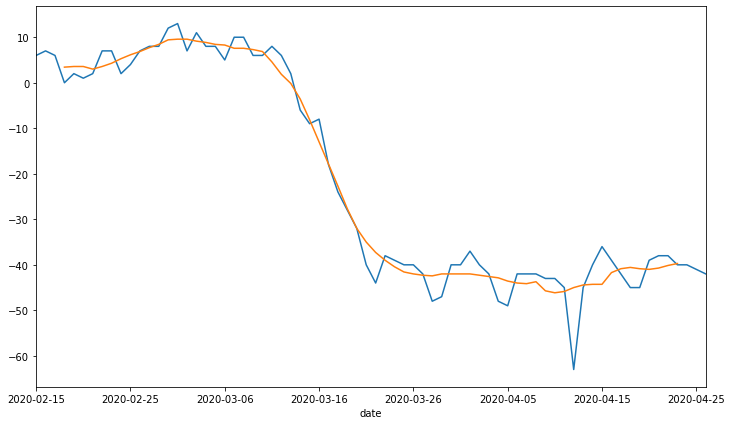

In [6]:
us_overall_google = united_states_mobility.iloc[np.where(united_states_mobility.sub_region_1.astype('str') == 'nan')]
us_overall_google = us_overall_google.set_index('date')
plt.figure(figsize = (12, 7))
us_overall_google.retail_and_recreation_percent_change_from_baseline.plot()

# Compute the centered 7-day rolling mean
us_overall_7d_google = us_overall_google[data_columns_google].rolling(7, center=True).mean()
# # Resample to weekly frequency, aggregating with mean
# # us_overall.index = pd.to_datetime(us_overall.index)
# # us_overall_weekly_mean = us_overall[data_columns].resample('W').mean()

# plt.figure(figsize = (12, 7))
# us_overall.retail_and_recreation_percent_change_from_baseline.plot(label = "Daily")
# # us_overall_weekly_mean.retail_and_recreation_percent_change_from_baseline.plot(label = "Weekly Mean Resample")
us_overall_7d_google.retail_and_recreation_percent_change_from_baseline.plot(label = '7-d Rolling Mean')
# plt.legend(loc = 'best')
# plt.show()

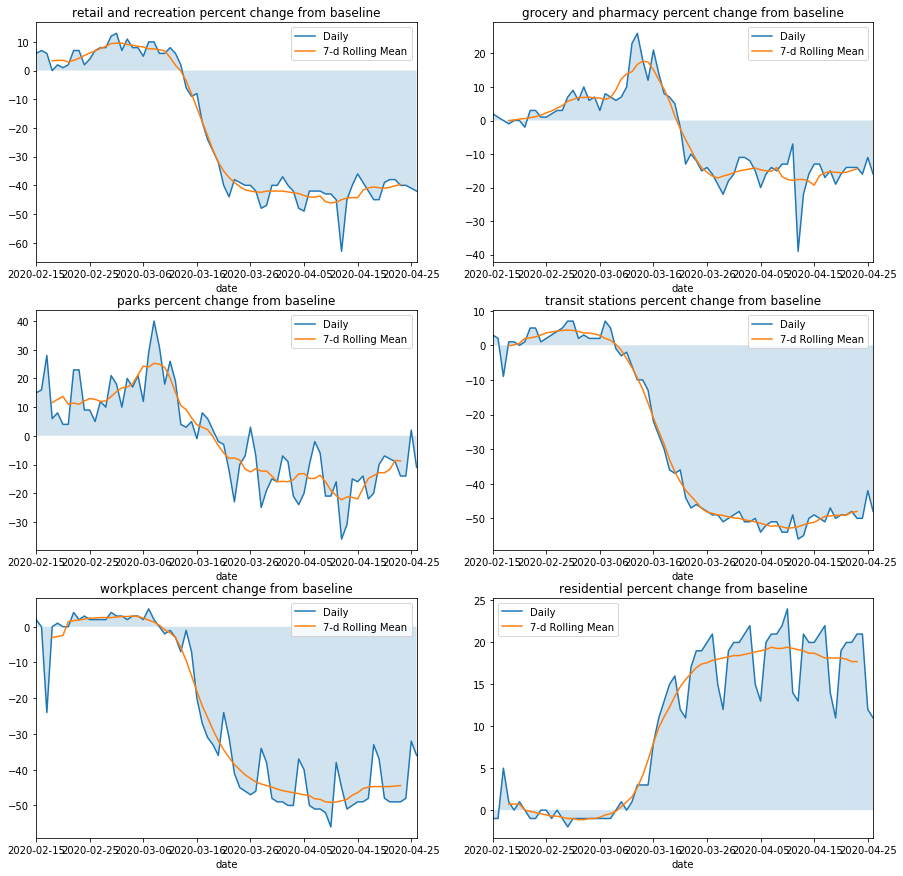

In [7]:
def plot_daily_rolling(df, col_name_lst):
    rolling_7d = df[col_name_lst].rolling(7, center=True).mean()
    
    fig, axes = plt.subplots(round(len(col_name_lst) / 2), 2, figsize = (15, 15))
    for i, col_name in enumerate(col_name_lst):
        df[col_name].plot(label = "Daily", ax = axes[i // 2][i % 2])
        rolling_7d[col_name].plot(label = '7-d Rolling Mean', ax = axes[i // 2][i % 2])
        axes[i // 2][i % 2].fill_between(df.index, 0, df[col_name], alpha = 0.2)
        axes[i // 2][i % 2].set_title(col_name.replace('_', " "))
        axes[i // 2][i % 2].legend(loc = 'best')
        
    plt.show()

        
plot_daily_rolling(us_overall_google, data_columns_google)


In [8]:
np.unique(united_states_mobility.iloc[np.where(united_states_mobility.sub_region_1.astype('str') == 'Washington')].sub_region_2.astype('str'))

array(['Adams County', 'Asotin County', 'Benton County', 'Chelan County',
       'Clallam County', 'Clark County', 'Cowlitz County',
       'Douglas County', 'Ferry County', 'Franklin County',
       'Grant County', 'Grays Harbor County', 'Island County',
       'Jefferson County', 'King County', 'Kitsap County',
       'Kittitas County', 'Klickitat County', 'Lewis County',
       'Lincoln County', 'Mason County', 'Okanogan County',
       'Pacific County', 'Pend Oreille County', 'Pierce County',
       'San Juan County', 'Skagit County', 'Skamania County',
       'Snohomish County', 'Spokane County', 'Stevens County',
       'Thurston County', 'Walla Walla County', 'Whatcom County',
       'Whitman County', 'Yakima County', 'nan'], dtype=object)

In [9]:
def get_county(state, county):
    all_counties = united_states_mobility.iloc[np.where(united_states_mobility.sub_region_1.astype('str') == state)]
    county_overall = all_counties.iloc[np.where(all_counties.sub_region_2.astype('str') == county)]
    county_overall = county_overall.set_index('date')
    return county_overall

def get_state_overall(state):
    return get_county(state, 'nan')

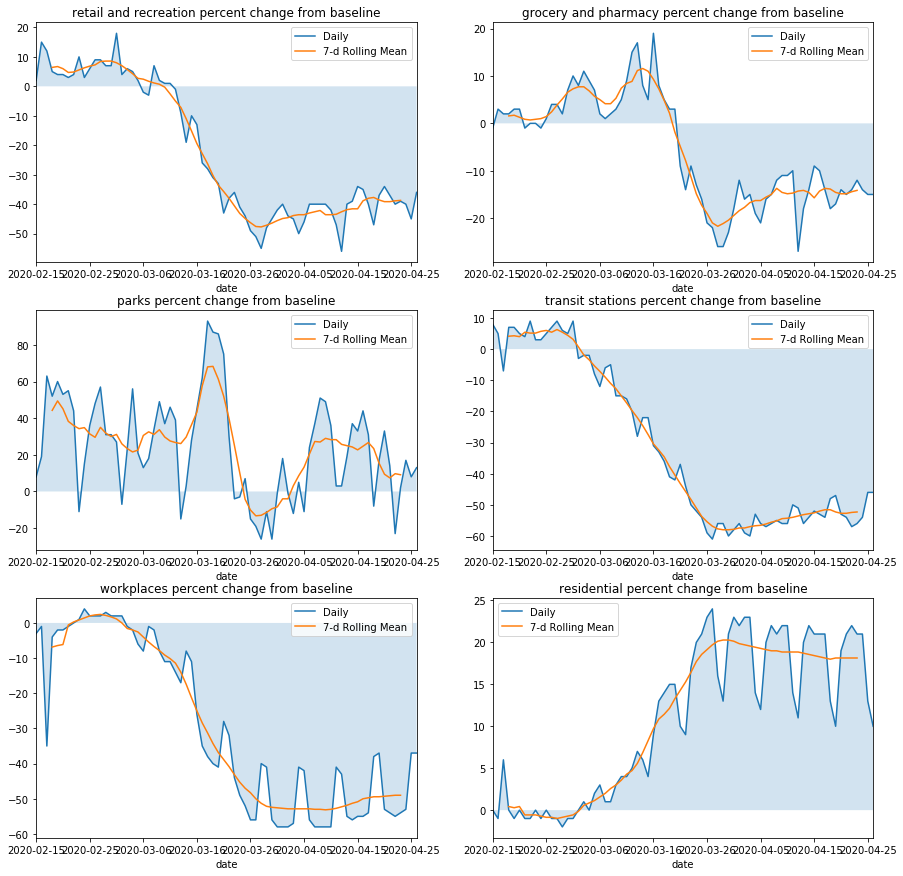

In [10]:
wa_overall = get_state_overall('Washington')
plot_daily_rolling(wa_overall, data_columns_google)

### Apple Mobility Data

https://www.apple.com/covid19/mobility

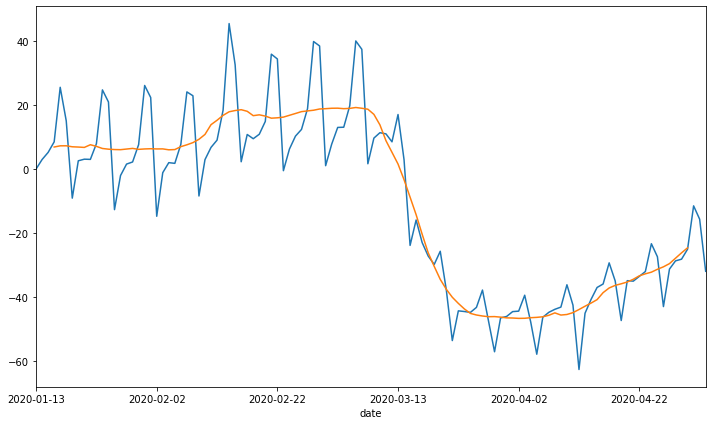

In [11]:
apple_mobility = pd.read_csv('data/applemobilitytrends-2020-05-03.csv') # will need to change this
apple_us = apple_mobility[apple_mobility['region'] == 'United States']

# NECESSARY DATA WRANGLING

data_columns_apple = ['driving', 'transit', 'walking']

apple_us_total = apple_us[apple_us['geo_type'] == 'country/region']
transposed_apple = apple_us_total.drop(columns=['geo_type', 'region', 'alternative_name']).T
transposed_apple = transposed_apple.reset_index().rename(columns={'index': 'date', 146: 'driving', 147: 'transit', 148:'walking'}).iloc[1:]
transposed_apple[data_columns_apple] = transposed_apple[data_columns_apple].astype('float64')
transposed_apple = transposed_apple.set_index('date')

# centering to reflect how the google mobility data is structured
transposed_apple = transposed_apple - 100

us_overall_7d_apple = transposed_apple[data_columns_apple].rolling(7, center=True).mean()

plt.figure(figsize = (12, 7))
transposed_apple.driving.plot()
us_overall_7d_apple.driving.plot()


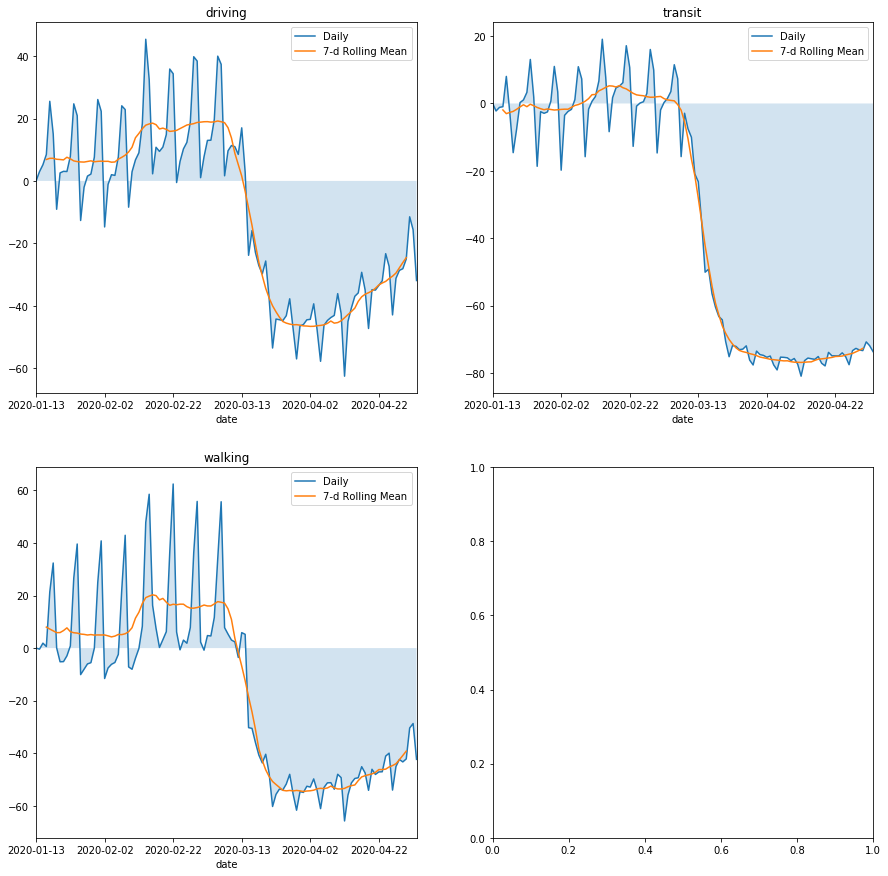

In [12]:
plot_daily_rolling(transposed_apple, data_columns_apple)

# SIR Model with Modifications

Basic SIR model: https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

Variables in the SIR model:

- **N:** total population
- **S(t):** number of people susceptible on day *t*
- **E(t):** number of people exposed on day *t*
- **I(t):** number of people infected on day *t*
- **R(t):** number of people recovered on day *t*
- **D(t):** number of people dead on day *t*
- **$\mathbf{\beta}$:** expected amount of people an infected person infects per day
- **D:** number of days an infected person has and can spread the disease
- **$\mathbf{\gamma}$:** the proportion of infected recovering per day ($\gamma = 1 / D$)
- **R$_0$:** the total number of people an infected person infects ($R_0 = \beta / \gamma$)
- **$\mathbf{\delta}$:** length of incubation period
- **$\mathbf{\alpha}$:** fatality rate
- **$\mathbf{\rho}$:** rate at which people die ($\rho = 1 / $ days from infected until death)

Plotting functions:

In [13]:
def plotseird(t, S, E, I, R, D):
    '''
    Plot the SIR model defined by the S (susceptible), E (exposed), I (infected), R (recovered), D (dead) arrays 
    '''
    f, ax = plt.subplots(1,1,figsize=(12,7))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
#     ax.axhline(1.12 * 10**6, t[0], t[-1], color = 'r', alpha=0.7, linewidth=1, label='current infected estimate')
#     ax.axhline(69171, t[0], t[-1], color = 'black', alpha=0.7, linewidth=1, label='current death estimate')
#     ax.axvline(104, 0, 2 * 10**6, color = 'cornflowerblue', alpha=0.7, linewidth=1, label='current day')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
#     ax.set_ylim((0, 2 * 10**6))
    plt.show();

In [14]:
def plotseird_both(t, S_orig, E_orig, I_orig, R_orig, D_orig, S, E, I, R, D):
    '''
    Plot two SIR models
    '''
    f, ax = plt.subplots(1,1,figsize=(12,7))
    ax.plot(t, S_orig, 'b', alpha=0.2, linewidth=1, label='Susceptible Original')
    ax.plot(t, E_orig, 'y', alpha=0.2, linewidth=1, label='Exposed Original')
    ax.plot(t, I_orig, 'r', alpha=0.2, linewidth=1, label='Infected Original')
    ax.plot(t, R_orig, 'g', alpha=0.2, linewidth=1, label='Recovered Original')
    ax.plot(t, D_orig, 'k', alpha=0.2, linewidth=1, label='Dead Original')
    ax.plot(t, S_orig+E_orig+I_orig+R_orig+D_orig, 'c--', alpha=0.2, linewidth=1, label='Total Original')
    
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

In [15]:
def plotseird_both_subplots(t, S_orig, E_orig, I_orig, R_orig, D_orig, S, E, I, R, D):
    '''
    Plots subplots of each curve to observe difference between original and adjusted model
    '''
    f, ax = plt.subplots(3,2,figsize=(20,17))
    ax[2, 0].plot(t, S_orig, 'b', alpha=0.2, linewidth=1, label='Susceptible Original')
    ax[2, 0].plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible New Model')
    ax[0, 0].plot(t, E_orig, 'y', alpha=0.2, linewidth=1, label='Exposed Original')
    ax[0, 0].plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed New Model')
    ax[0, 1].plot(t, I_orig, 'r', alpha=0.2, linewidth=1, label='Infected Original')
    ax[0, 1].plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected New Model')
    ax[1, 0].plot(t, R_orig, 'g', alpha=0.2, linewidth=1, label='Recovered Original')
    ax[1, 0].plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered New Model')
    ax[1, 1].plot(t, D_orig, 'k', alpha=0.2, linewidth=1, label='Dead Original')
    ax[1, 1].plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead New Model')

    ax[2, 1].plot(t, S_orig, 'b', alpha=0.2, linewidth=1, label='Susceptible Original')
    ax[2, 1].plot(t, E_orig, 'y', alpha=0.2, linewidth=1, label='Exposed Original')
    ax[2, 1].plot(t, I_orig, 'r', alpha=0.2, linewidth=1, label='Infected Original')
    ax[2, 1].plot(t, R_orig, 'g', alpha=0.2, linewidth=1, label='Recovered Original')
    ax[2, 1].plot(t, D_orig, 'k', alpha=0.2, linewidth=1, label='Dead Original')
    ax[2, 1].plot(t, S_orig+E_orig+I_orig+R_orig+D_orig, 'c--', alpha=0.2, linewidth=1, label='Total Original')
    
    ax[2, 1].plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible New Model')
    ax[2, 1].plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed New Model')
    ax[2, 1].plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected New Model')
    ax[2, 1].plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered New Model')
    ax[2, 1].plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead New Model')
    ax[2, 1].plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    
    
    for a in ax:  
        for i in range(2):
            a[i].set_xlabel('Time (days)')
            a[i].yaxis.set_tick_params(length=0)
            a[i].xaxis.set_tick_params(length=0)
            a[i].grid(b=True, which='major', c='w', lw=2, ls='-')
            legend = a[i].legend()
            legend.get_frame().set_alpha(0.5)
            for spine in ('top', 'right', 'bottom', 'left'):
                a[i].spines[spine].set_visible(False)
    plt.show();

SIR model definition:

In [16]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    '''
    Find the derivatives necessary to calculate the SIR model changes
    '''
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

def deriv_original(y, t, N, beta, gamma, delta, alpha, rho):
    '''
    Find the derivatives necessary to calculate the SIR model changes (when beta is constant)
    '''
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [17]:
# Thoughts for Google Mobility data coefs
# Retail recreation - negative, harder to social distance
# Grocery pharmacy - negative, easier to social distance
# Parks - neutral, easier to social distance
# Transit stations - negative, harder to social distance
# Workplaces - negative, harder to social distance
# Residential - positive, social distanced
# R_0_change = (-)rr_coef * (% change from baseline) + (-)gp_coef * (% change from baseline) 
#            + (-)p_coef * (% change from baseline) + (-)ts_coef * (% change from baseline) 
#            + (-)w_coef * (% change from baseline) + (+)r_coef * (% change from baseline)
# negative coef ranking: rr_coef >= ts_coef >= w_coef > gp_coef >= p_coef

SIR model coefficient estimates:

In [18]:
################### SIR COEFFICIENT ESTIMATES FROM EXTERNAL SCHOLARLY WORK ###################
N = 328.2 * 10**6 # Total population
# https://www.health.harvard.edu/diseases-and-conditions/if-youve-been-exposed-to-the-coronavirus
# mild infection seems to last one - two weeks, typically infectious 48 - 72 hours before showing symptoms
D = 14.0
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

# initial R_0 estimate https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article
initial_r_0 = 5.7

alpha = 0.14  # 14% death rate (estimated from current worldwide statistics, we are taking the lower estimate 
# because there are probably a lot of asymptomatic cases that are not identified)
rho = 1 / 9  # 9 days from infection until death
###################

# Needs to be tuned
google_weights = [-1, -0.5, -0.5, -1, -1, 2]

# day 0 = January 21, first day of Google mobility 7d rolling is Feb 18, 28 days later

SIR model functions (for $R_0$ and $\beta$):

In [19]:
def R_0(t, initial_r_0, coefs, mobility_df, data_columns):
    '''
    Uses U.S. mobility data as a proxy to find the adjusted R_0 value for Covid-19 in the U.S.
    
    t: time, integer value starting from 0 where 0 = January 21, 2020
    initial_r_0: the initial R_0 value (estimated from https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article)
    coefs: the weights for each type of mobility category
    mobility_df: the mobility dataframe (shows percent change from baseline value)
    data_columns: the mobility categories
    
    returns: an adjusted R_0 value
    '''
    
    mobility_df = mobility_df.dropna()

    r_0 = initial_r_0
    r_0_change = 0
    # First day recorded, last day recorded
    # TODO - change hardcoded numbers to match model
    max_data_idx = len(mobility_df) - 1
    
    # Match the mobility data time scale to the model time scale 
    # (this will need to be adjusted with the forecasted mobility models)
    data_idx_delta = (pd.to_datetime('2020-01-21') - pd.to_datetime(mobility_df.iloc[0].name)).days
    adjusted_t = int(t + data_idx_delta)
    if adjusted_t >= 0 and adjusted_t <= max_data_idx:
        for coef, col in zip(coefs, data_columns):
            r_0_change += coef * mobility_df.iloc[adjusted_t][col] / 100
        r_0 -= r_0_change
#         print(max(r_0, 0))
    elif adjusted_t > max_data_idx:
        ## TODO - add the forecasted model here (elif becomes else and value is drawn from forecasted model)
        for coef, col in zip(coefs, data_columns):
            r_0_change += coef * mobility_df.iloc[max_data_idx][col] / 100
        r_0 -= r_0_change
    return max(r_0, 0) 

# for t in range(0, 120):
#     R_0(t, 5.7, [-1, -1, -1], us_overall_7d, data_columns_google)

def beta_google(t):
    return R_0(t, initial_r_0, google_weights, us_overall_7d_google, data_columns_google) * gamma

In [20]:
# initial conditions: one exposed
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  
y0 = S0, E0, I0, R0, D0 

# Grid of time points (in days), observe a one year period
t = np.linspace(0, 365, 366) 

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta_google, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

Social Distancing, (Google mobility data for R_0 proxy)


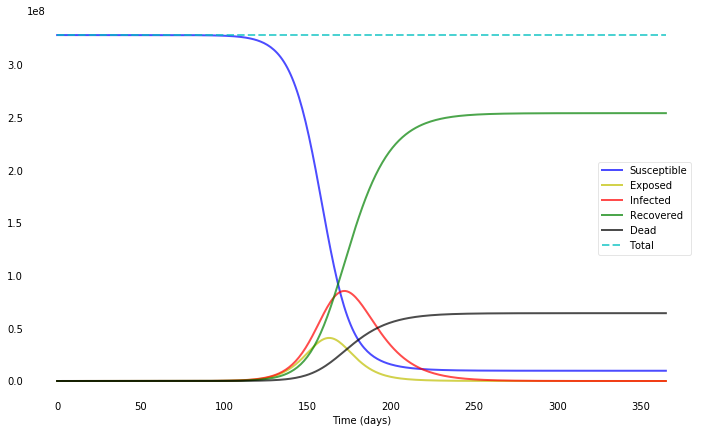

In [21]:
print("Social Distancing, (Google mobility data for R_0 proxy)")
plotseird(t, S, E, I, R, D)

In [22]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_original, y0, t, args=(N, 5.7 * gamma, gamma, delta, alpha, rho))
S_orig, E_orig, I_orig, R_orig, D_orig = ret.T

No Social Distancing, (R_0 stays constant at 5.7)


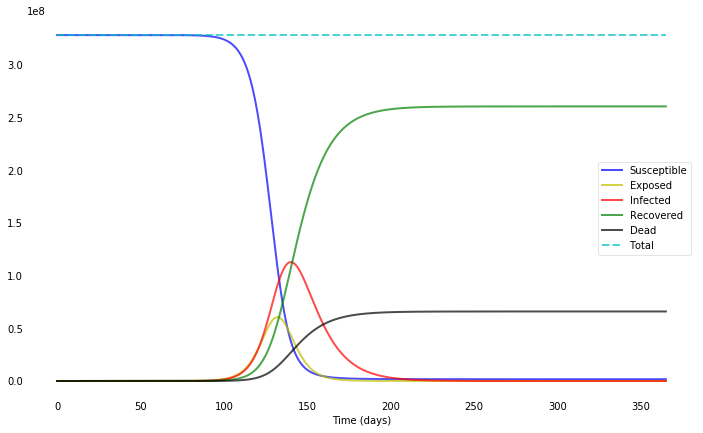

In [23]:
print("No Social Distancing, (R_0 stays constant at 5.7)")
plotseird(t, S_orig, E_orig, I_orig, R_orig, D_orig)

Google mobility model overlayed with original model


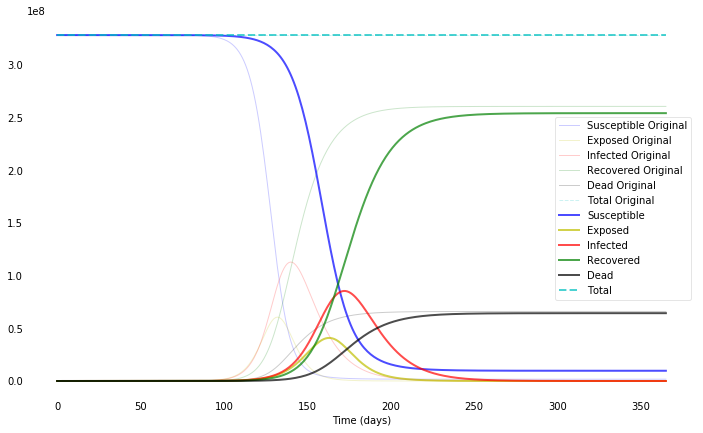

In [24]:
print("Google mobility model overlayed with original model")
plotseird_both(t, S_orig, E_orig, I_orig, R_orig, D_orig, S, E, I, R, D)

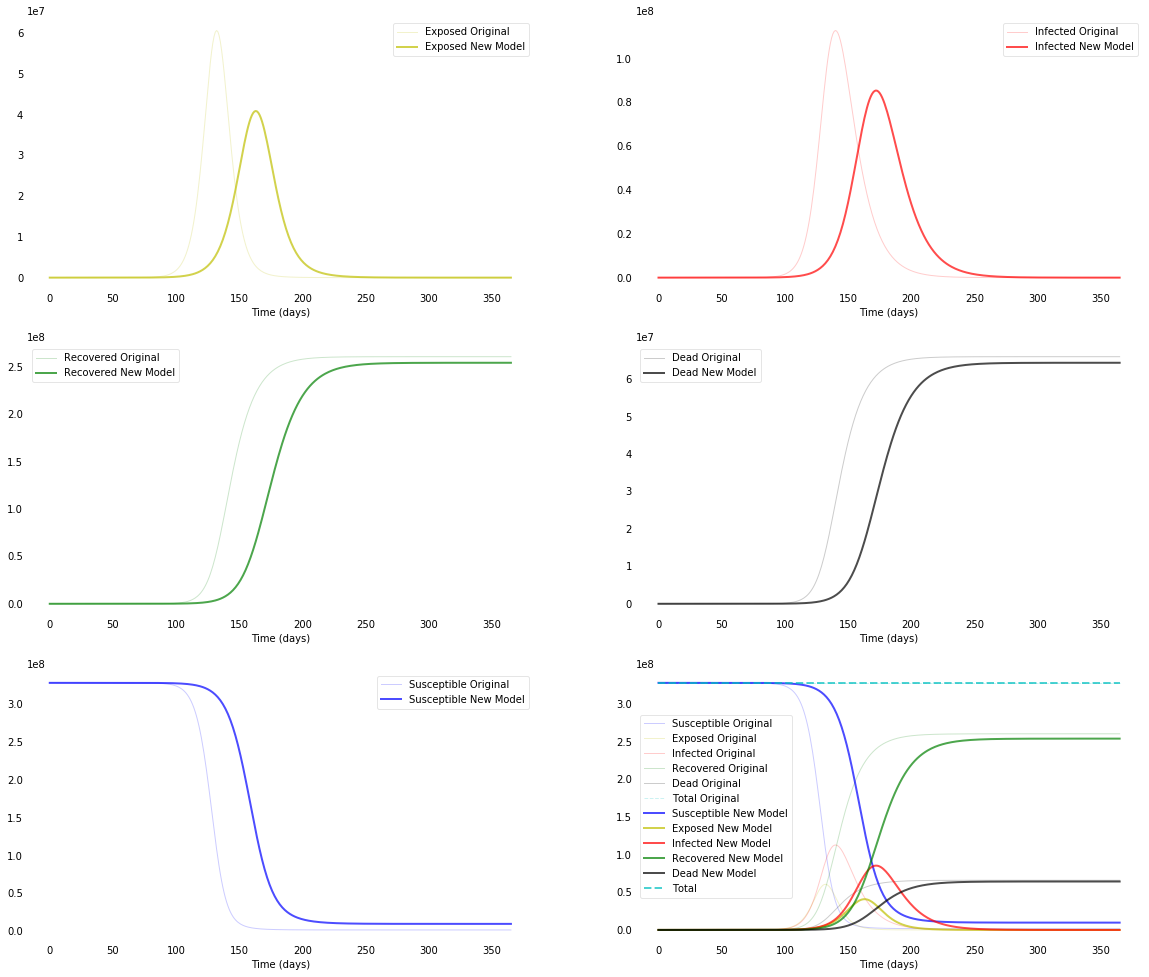

In [25]:
plotseird_both_subplots(t, S_orig, E_orig, I_orig, R_orig, D_orig, S, E, I, R, D)

## Apple Mobility Data SIR

In [26]:
# THIS IS WHERE YOU TUNE PARAMETERS
apple_weights = [-1, -1, -1]

def beta_apple(t):
    return R_0(t, 5.7, apple_weights, us_overall_7d_apple, data_columns_apple) * gamma

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta_apple, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

Social Distancing, (Apple mobility data for R_0 proxy)


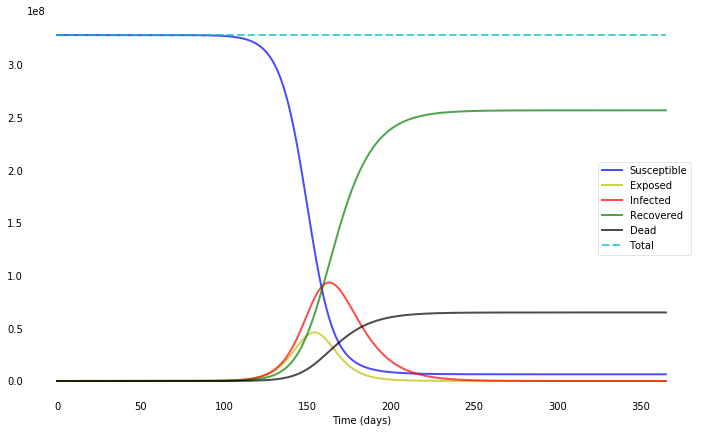

In [27]:
print("Social Distancing, (Apple mobility data for R_0 proxy)")
plotseird(t, S, E, I, R, D)

Apple mobility model overlayed with original model


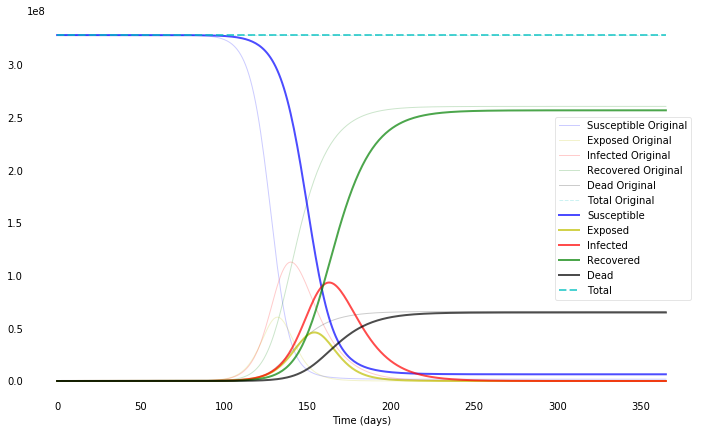

In [28]:
print("Apple mobility model overlayed with original model")
plotseird_both(t, S_orig, E_orig, I_orig, R_orig, D_orig, S, E, I, R, D)

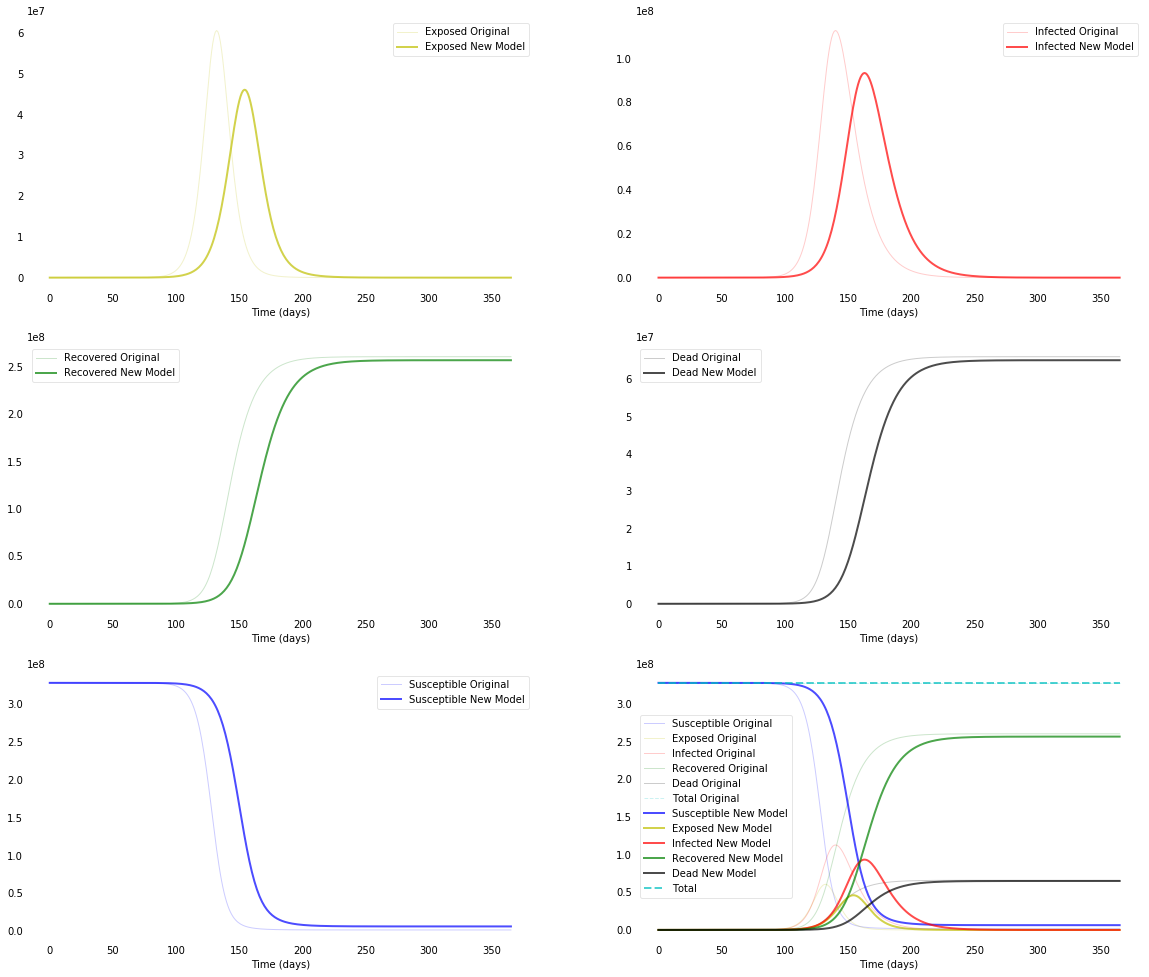

In [29]:
plotseird_both_subplots(t, S_orig, E_orig, I_orig, R_orig, D_orig, S, E, I, R, D)

## Model ideas

- Time series forecasting to extend the mobility data to predict/model the future and past
- Fine tune the parameter values
- Further adjust the $R_0$ function (maybe some type of logistic or dependent on past $R_0$)
- Add resource and age dependent fatality rates